### Load a model

In [1]:
from fastai2.vision.all import *
from fastai2.basics import *
from torchvision.models import vgg19, vgg16
from PIL import Image
from imports.suttstyle import StyleImport

In [2]:
url = 'https://ctl.s6img.com/society6/img/yURhlP8Yf7h1wgwFeytyL_BE0vQ/w_700/canvas/~artwork/s6-original-art-uploads/society6/uploads/misc/bda1b2244723406081b31a23f856e094/~~/watercolor-handsome-man-face-beard-black-and-white-canvas.jpg'
model_fn = 'pencil_model'

In [3]:
s = StyleImport()

saving to file: style0.jpg
success!
b''


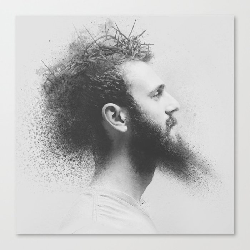

In [6]:
img_fn = s.pull_style_target(url)

style_img = Image.open(img_fn)
style_img.resize((250,250))

In [15]:
_ = s.build_feats()
loss_func = s.build_loss_func(style_fn = img_fn)
tnet = s.build_arch()
dls = s.build_dls()

In [16]:
learn = Learner(dls, tnet, loss_func=loss_func)

In [17]:
learn.fit_one_cycle(1,8e-4)

epoch,train_loss,valid_loss,time
0,9.459265,9.351297,21:49


In [18]:
learn.save(model_fn)

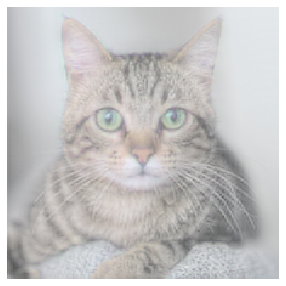

In [19]:
pred_img2 = learn.predict('cat.jpg')
pred_img2[0].show()

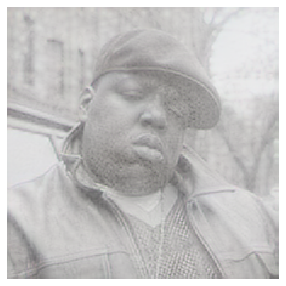

In [20]:
pred_img = learn.predict('biggie_photo.jpg')
pred_img[0].show()